In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import sys
sys.path.append('/home/r8user2/fastai/old')
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *
import matplotlib.pyplot as plt

In [2]:
# Selected data
PATH = '/home/r8user2/Documents/HY/dress_data/alex_workplace/dressdata_project/git_workplace/selected_gd_data_5'
# Full data
#PATH = '/home/r8user2/Documents/HY/dress_data/datasets'
sz = 299

In [4]:
arch = resnext50
data = ImageClassifierData.from_paths(path = PATH,
                                      tfms = tfms_from_model(arch, sz),
                                      trn_name = 'imgtrain',
                                      val_name = 'imgval',
                                      # utilize CPUs in remote
                                      num_workers = 60)
learn = ConvLearner.pretrained(arch, data, precompute = True)

100%|██████████| 24/24 [00:32<00:00,  1.00s/it]


In [5]:
learn.fit(0.01, 20)

epoch      trn_loss   val_loss   accuracy                    
    0      0.830817   0.678471   0.730975  
    1      0.681627   0.624223   0.750334                    
    2      0.597383   0.566764   0.783712                    
    3      0.53629    0.541833   0.790387                    
    4      0.492472   0.517411   0.797063                    
    5      0.462534   0.506594   0.816422                    
    6      0.410528   0.499019   0.806409                    
    7      0.387294   0.491564   0.818425                    
    8      0.370857   0.45318    0.837784                    
    9      0.334701   0.453032   0.840454                    
    10     0.30328    0.464856   0.831776                    
    11     0.298954   0.448551   0.836449                    
    12     0.283739   0.459869   0.835113                    
    13     0.253224   0.446724   0.847797                    
    14     0.251319   0.425879   0.848465                    
    15     0.232172   0.45

[array([0.43209]), 0.855140186677151]

In [6]:
learn.fit(0.01, 3, cycle_len = 1, cycle_mult = 2)

epoch      trn_loss   val_loss   accuracy                    
    0      0.165239   0.431285   0.855808  
    1      0.16674    0.44026    0.854473                    
    2      0.142457   0.431605   0.858478                    
    3      0.156881   0.428417   0.853805                    
    4      0.149618   0.44546    0.853138                    
    5      0.113003   0.445301   0.85781                     
    6      0.109913   0.439342   0.856475                    



[array([0.43934]), 0.8564753001617972]

In [11]:
learn.lr_find(1e-10, 1e-5)

epoch      trn_loss   val_loss   accuracy                    
    0      0.111243   0.437435   0.858478  



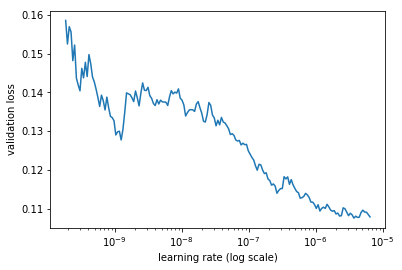

In [12]:
learn.sched.plot()

In [14]:
import numpy as np
lrs = np.array([1e-9, 1e-8, 1e-7])
learn.unfreeze()
learn.fit(lrs, 4, cycle_len = 1, cycle_mult = 2)

epoch      trn_loss   val_loss   accuracy                    
    0      0.144477   0.439325   0.854473  
    1      0.136474   0.444972   0.85514                     
    2      0.14509    0.443572   0.851802                    
    3      0.143049   0.439373   0.85781                     
    4      0.141043   0.440239   0.855808                    
    5      0.153362   0.44477    0.853138                    
    6      0.147189   0.442359   0.857143                    
    7      0.150762   0.445101   0.85514                     
    8      0.137513   0.442312   0.859146                    
    9      0.150435   0.44105    0.858478                    
    10     0.138497   0.435754   0.854473                    
    11     0.142609   0.439371   0.85781                     
    12     0.145653   0.438438   0.860481                    
    13     0.132182   0.438264   0.857143                    
    14     0.148258   0.43964    0.855808                    



[array([0.43964]), 0.8558077438969478]